
# Gurgen Hovakimyan
# Weather Check data visualization

### Introduction to data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
df = pd.read_csv("weather-check.csv")

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


As we see we have long column names and it will be better if will change it.

In [4]:
df.columns = ["ID", "Report_Check", "Check_Type", "App_Website",
              "Smart_Watch_Use", "Age", "Gender", "Income", "Region"]

In [5]:
df.head()

,ID,Report_Check,Check_Type,App_Website,Smart_Watch_Use,Age,Gender,Income,Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               928 non-null    int64 
 1   Report_Check     928 non-null    object
 2   Check_Type       928 non-null    object
 3   App_Website      928 non-null    object
 4   Smart_Watch_Use  928 non-null    object
 5   Age              928 non-null    object
 6   Gender           928 non-null    object
 7   Income           928 non-null    object
 8   Region           928 non-null    object
dtypes: int64(1), object(8)
memory usage: 65.4+ KB


In [7]:
df.describe(include="object")

,Report_Check,Check_Type,App_Website,Smart_Watch_Use,Age,Gender,Income,Region
count,928,928,928,928,928,928,928,928
unique,2,9,122,5,5,3,12,10
top,Yes,The default weather app on your phone,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
freq,746,213,753,362,278,527,169,185


In [8]:
df[df.select_dtypes(['object']).columns] =\
    df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

If we delete rows with **dashes** we will lose to much information. Better to change with NaN.

In [11]:
df = df.replace("-", np.NaN)

### Visualization

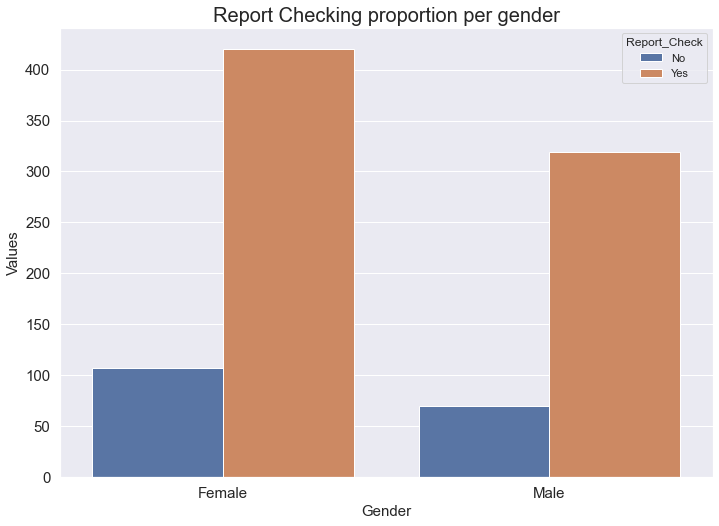

In [12]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.countplot(x="Gender", hue="Report_Check", data=df)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("Values", fontsize=15)
ax.set_title("Report Checking proportion per gender", fontsize=20)
ax.tick_params(labelsize=15)

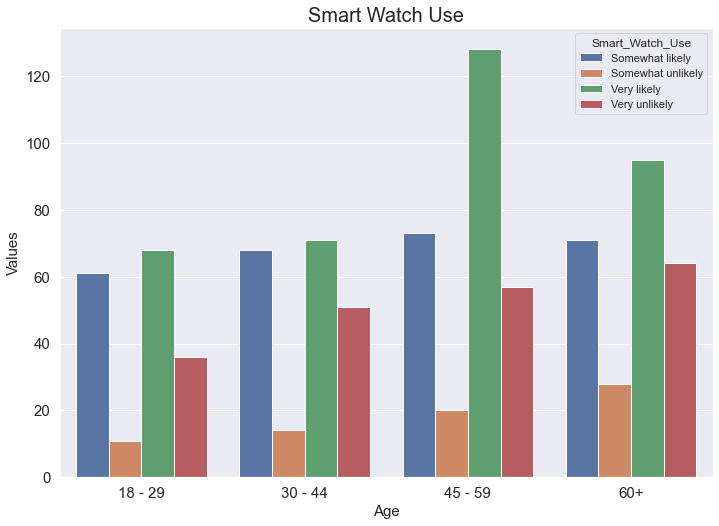

In [13]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.countplot(x="Age", hue="Smart_Watch_Use", data=df)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Values", fontsize=15)
ax.set_title("Smart Watch Use", fontsize=20)
ax.tick_params(labelsize=15)

In [14]:
df['Age_Value'] = df['Age'].astype(
    str).str[:2].replace("na", np.NaN).astype(float)

In [15]:
temp_data = df.groupby("Age")["Age"].count()
temp_data

Age
18 - 29    176
30 - 44    204
45 - 59    278
60+        258
Name: Age, dtype: int64

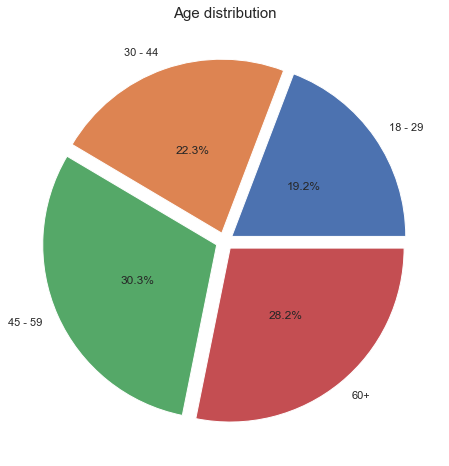

In [16]:
pie, ax = plt.subplots(figsize=[10, 8])
labels = temp_data.keys()
plt.pie(x=temp_data, autopct="%.1f%%", explode=[
        0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Age distribution", fontsize=15)
pie.savefig("Age_Distribution.png")

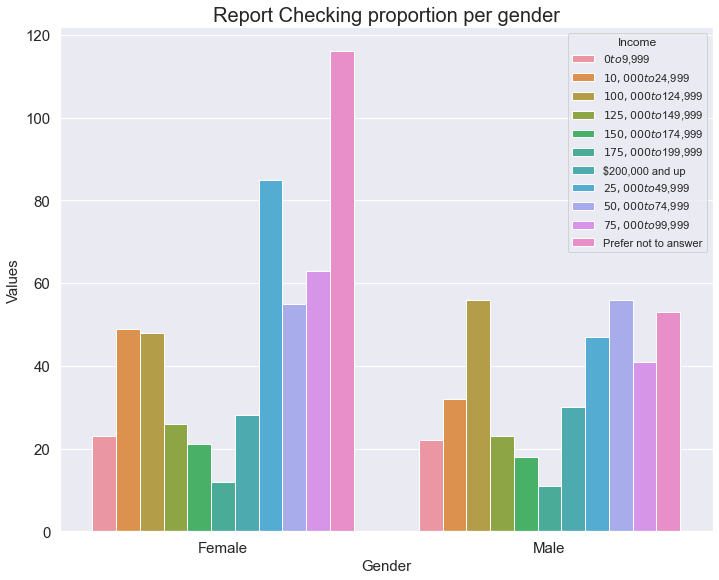

In [18]:
sns.set(rc={'figure.figsize': (11.7, 9.27)})
ax = sns.countplot(x="Gender", hue="Income", data=df)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("Values", fontsize=15)
ax.set_title("Report Checking proportion per gender", fontsize=20)
ax.tick_params(labelsize=15)

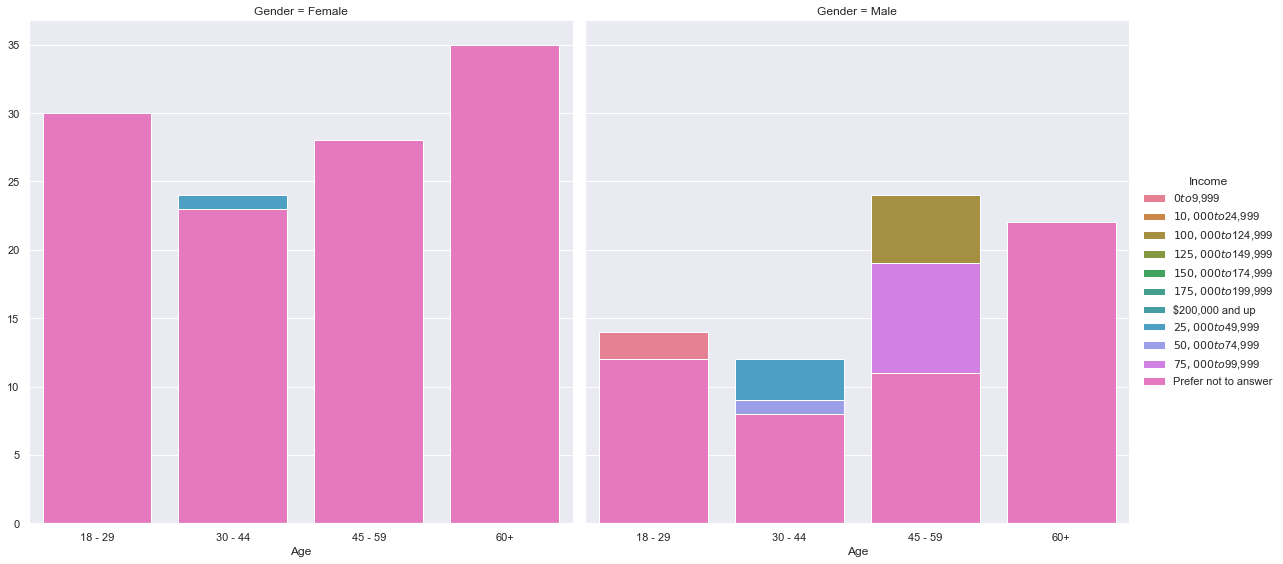

In [54]:
g = sns.FacetGrid(df, col="Gender", hue="Income", height=8)
g.map(sns.countplot, "Age", order=["18 - 29", "30 - 44", "45 - 59", "60+"])
g.add_legend()

#### Thakn you
#### Gurgen Hovakimyan